<a href="https://colab.research.google.com/github/q-Mante/SalesForecasting-TimeSeries/blob/main/SalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: predict transactions according to previous recorded data in time interval. Link to [data set](https://www.kaggle.com/c/store-sales-time-series-forecasting/data?select=transactions.csv).

# Time Series Forecasting

Installing dependencies

In [ ]:
!pip install prophet
!pip install pandas

Importing libraries

In [3]:
import pandas as pd
from prophet import Prophet

Loading data table

In [15]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/q-Mante/SalesForecasting-TimeSeries/main/transactions.csv", delimiter=',')
dataframe

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


Checking if variable types are compatable with model

In [16]:
dataframe.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

From these results, we can see that the date column is a string. The model cannot accept it as it is.

In [17]:
dataframe["date"] = pd.to_datetime(dataframe["date"])
dataframe.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

Removing unnecessary variable "store_nbr"

In [18]:
dataframe.drop("store_nbr", axis = 1, inplace = True)
dataframe

,date,transactions
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922
...,...,...
83483,2017-08-15,2804
83484,2017-08-15,1573
83485,2017-08-15,2255
83486,2017-08-15,932


Rename two columns

In [19]:
dataframe.columns = ["ds", 'y']
dataframe

,ds,y
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922
...,...,...
83483,2017-08-15,2804
83484,2017-08-15,1573
83485,2017-08-15,2255
83486,2017-08-15,932


Ploting data

Text(0, 0.5, 'Transactions')

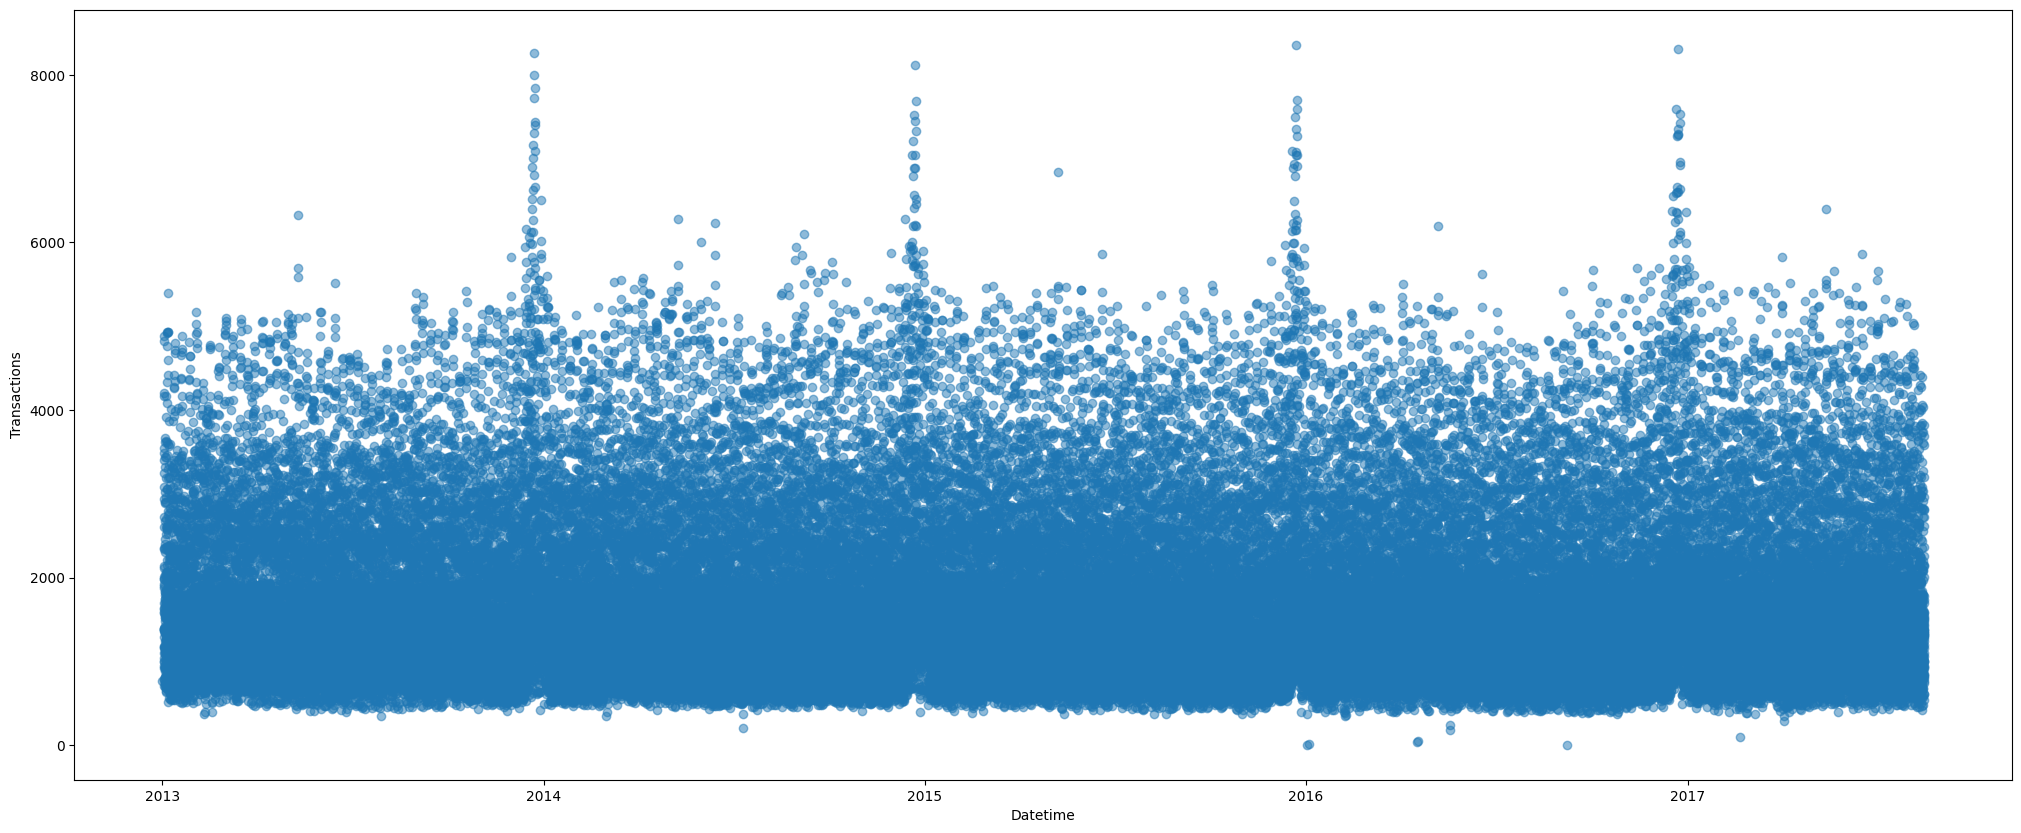

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25, 10))
plt.scatter(dataframe["ds"], dataframe["y"], alpha = 0.5)
plt.xlabel("Datetime")
plt.ylabel("Transactions")

Training the time series model. We use the interval_width argument to estimate the uncertainty interval from the number of samples used. We’ve set ours to 0.92. The argument daily_seasonality=True will fit daily seasonality for a sub-daily time series. It will default to weekly and yearly seasonalities if you don’t set this parameter.

In [ ]:
p = Prophet(interval_width = 0.92, daily_seasonality = True)
model = p.fit(dataframe)

Making predictions

In [56]:
future = p.make_future_dataframe(periods = 365, freq = 'D')
forecast_prediction = p.predict(future)
forecast_prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,954.054465,237.502368,3676.702743,954.054465,954.054465,1025.786185,1025.786185,1025.786185,736.330936,736.330936,736.330936,-95.389390,-95.389390,-95.389390,384.844638,384.844638,384.844638,0.0,0.0,0.0,1979.840650
1,2013-01-02,954.323481,364.140465,3630.170183,954.323481,954.323481,1007.306869,1007.306869,1007.306869,736.330936,736.330936,736.330936,-72.444977,-72.444977,-72.444977,343.420911,343.420911,343.420911,0.0,0.0,0.0,1961.630350
2,2013-01-03,954.592496,261.801931,3598.370877,954.592496,954.592496,893.099930,893.099930,893.099930,736.330936,736.330936,736.330936,-143.608707,-143.608707,-143.608707,300.377701,300.377701,300.377701,0.0,0.0,0.0,1847.692426
3,2013-01-04,954.861512,180.569170,3590.167723,954.861512,954.861512,953.272877,953.272877,953.272877,736.330936,736.330936,736.330936,-39.470750,-39.470750,-39.470750,256.412692,256.412692,256.412692,0.0,0.0,0.0,1908.134389
4,2013-01-05,955.130527,511.924385,3784.456617,955.130527,955.130527,1204.476249,1204.476249,1204.476249,736.330936,736.330936,736.330936,255.920826,255.920826,255.920826,212.224488,212.224488,212.224488,0.0,0.0,0.0,2159.606777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2018-08-11,1030.406200,340.364774,3679.294090,972.573530,1091.201569,923.690607,923.690607,923.690607,736.330936,736.330936,736.330936,255.920826,255.920826,255.920826,-68.561155,-68.561155,-68.561155,0.0,0.0,0.0,1954.096807
2043,2018-08-12,1030.588627,231.633417,3493.470725,972.383486,1091.570722,822.777593,822.777593,822.777593,736.330936,736.330936,736.330936,155.462534,155.462534,155.462534,-69.015876,-69.015876,-69.015876,0.0,0.0,0.0,1853.366220
2044,2018-08-13,1030.771054,-104.801974,3382.039080,972.193443,1091.939875,607.157396,607.157396,607.157396,736.330936,736.330936,736.330936,-60.469536,-60.469536,-60.469536,-68.704004,-68.704004,-68.704004,0.0,0.0,0.0,1637.928450
2045,2018-08-14,1030.953481,-24.030596,3435.059637,972.003399,1092.309028,573.353198,573.353198,573.353198,736.330936,736.330936,736.330936,-95.389390,-95.389390,-95.389390,-67.588348,-67.588348,-67.588348,0.0,0.0,0.0,1604.306679


Visualizing predictions

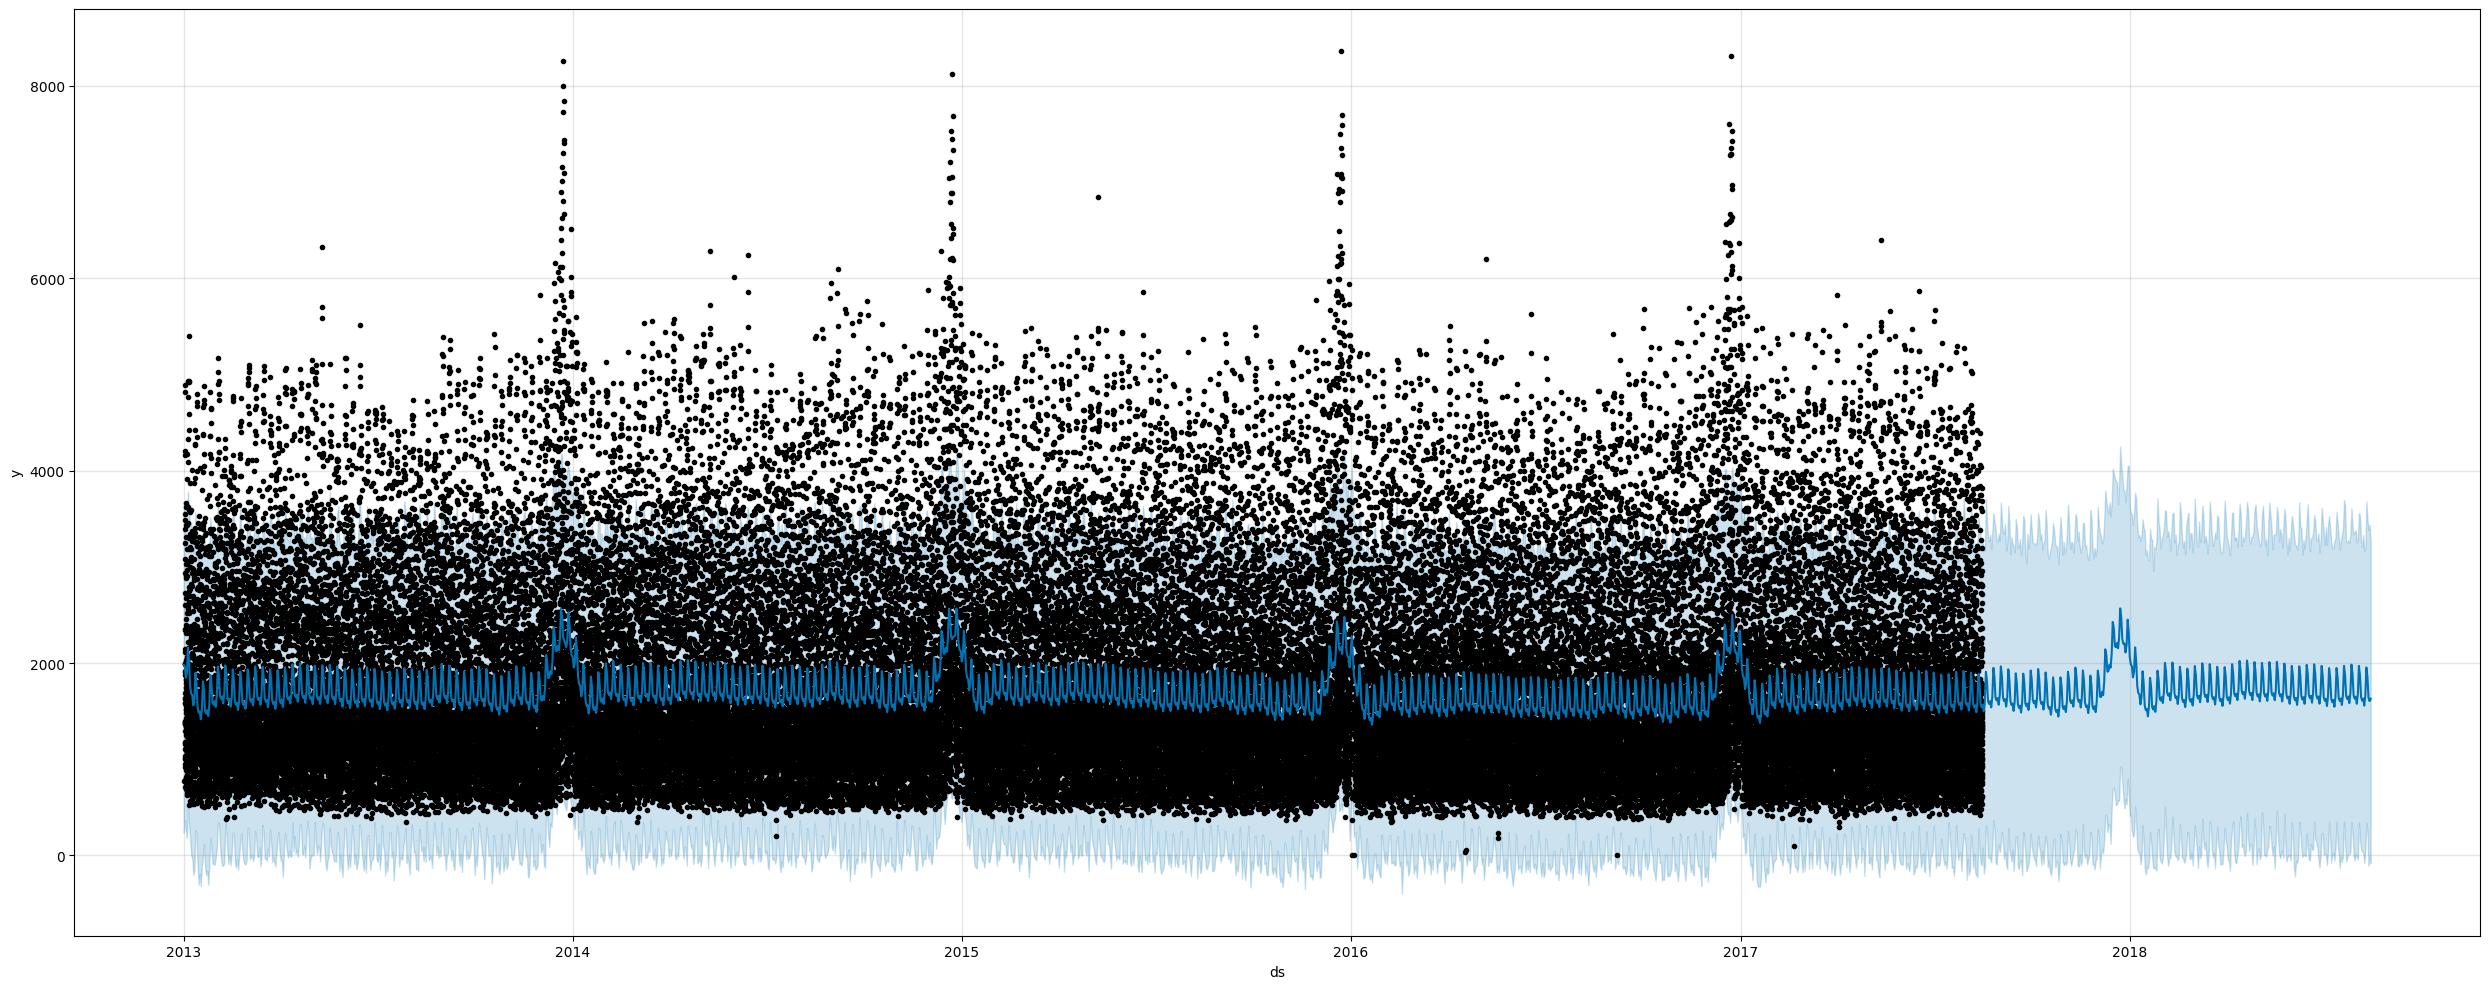

In [58]:
plot1 = p.plot(forecast_prediction, figsize = (25, 10))

Manipulating predictions

In [67]:
altered_prediction = forecast_prediction.copy();
altered_prediction["yhat"] = altered_prediction["yhat"].values * 2.5
altered_prediction 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,954.054465,237.502368,3676.702743,954.054465,954.054465,1025.786185,1025.786185,1025.786185,736.330936,736.330936,736.330936,-95.389390,-95.389390,-95.389390,384.844638,384.844638,384.844638,0.0,0.0,0.0,4949.601624
1,2013-01-02,954.323481,364.140465,3630.170183,954.323481,954.323481,1007.306869,1007.306869,1007.306869,736.330936,736.330936,736.330936,-72.444977,-72.444977,-72.444977,343.420911,343.420911,343.420911,0.0,0.0,0.0,4904.075875
2,2013-01-03,954.592496,261.801931,3598.370877,954.592496,954.592496,893.099930,893.099930,893.099930,736.330936,736.330936,736.330936,-143.608707,-143.608707,-143.608707,300.377701,300.377701,300.377701,0.0,0.0,0.0,4619.231065
3,2013-01-04,954.861512,180.569170,3590.167723,954.861512,954.861512,953.272877,953.272877,953.272877,736.330936,736.330936,736.330936,-39.470750,-39.470750,-39.470750,256.412692,256.412692,256.412692,0.0,0.0,0.0,4770.335973
4,2013-01-05,955.130527,511.924385,3784.456617,955.130527,955.130527,1204.476249,1204.476249,1204.476249,736.330936,736.330936,736.330936,255.920826,255.920826,255.920826,212.224488,212.224488,212.224488,0.0,0.0,0.0,5399.016942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2018-08-11,1030.406200,340.364774,3679.294090,972.573530,1091.201569,923.690607,923.690607,923.690607,736.330936,736.330936,736.330936,255.920826,255.920826,255.920826,-68.561155,-68.561155,-68.561155,0.0,0.0,0.0,4885.242018
2043,2018-08-12,1030.588627,231.633417,3493.470725,972.383486,1091.570722,822.777593,822.777593,822.777593,736.330936,736.330936,736.330936,155.462534,155.462534,155.462534,-69.015876,-69.015876,-69.015876,0.0,0.0,0.0,4633.415551
2044,2018-08-13,1030.771054,-104.801974,3382.039080,972.193443,1091.939875,607.157396,607.157396,607.157396,736.330936,736.330936,736.330936,-60.469536,-60.469536,-60.469536,-68.704004,-68.704004,-68.704004,0.0,0.0,0.0,4094.821124
2045,2018-08-14,1030.953481,-24.030596,3435.059637,972.003399,1092.309028,573.353198,573.353198,573.353198,736.330936,736.330936,736.330936,-95.389390,-95.389390,-95.389390,-67.588348,-67.588348,-67.588348,0.0,0.0,0.0,4010.766696


Visualizing predictions

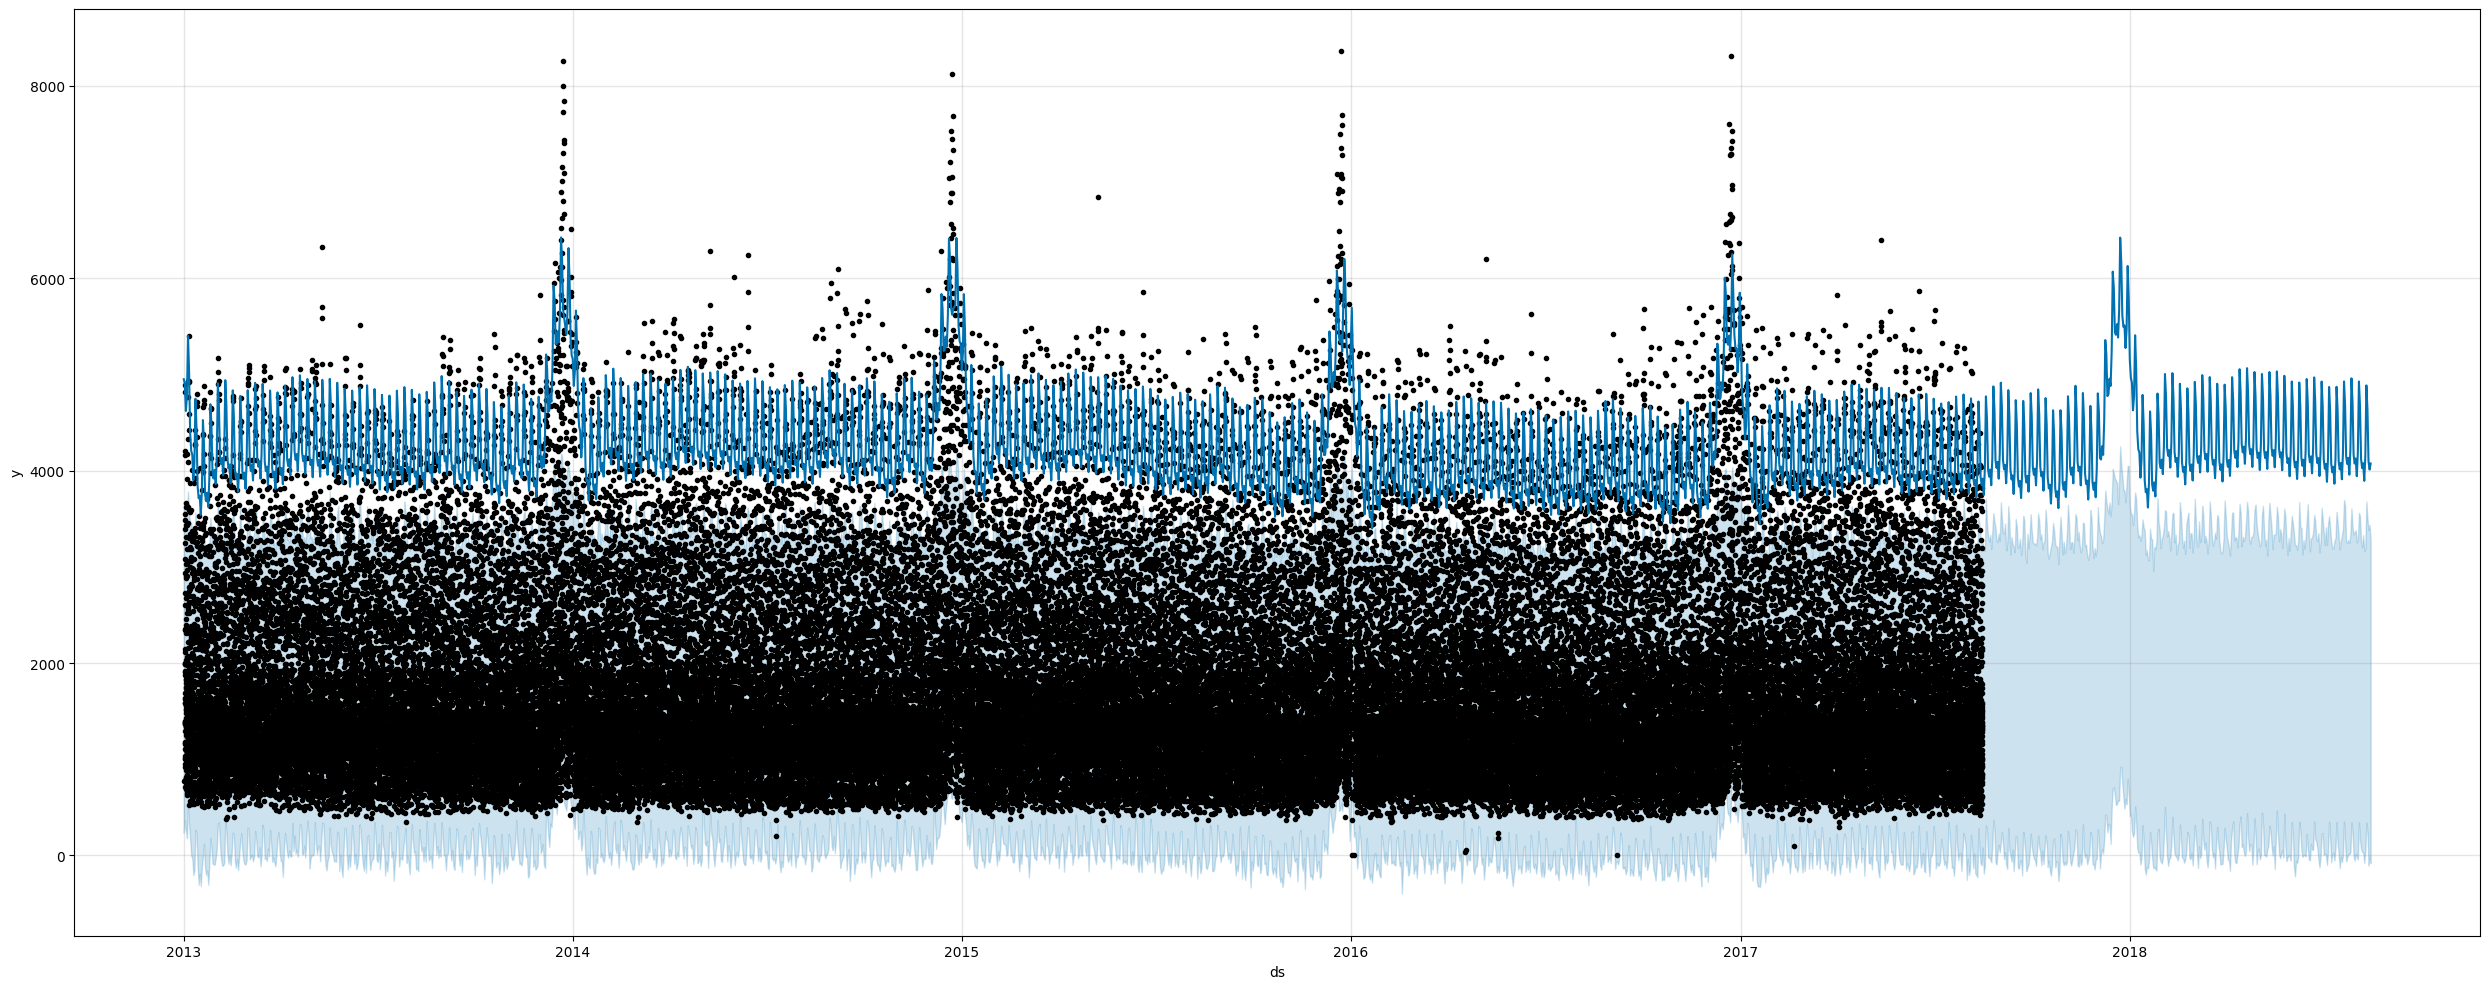

In [68]:
plot2 = p.plot(altered_prediction, figsize = (25, 10))

Ploting the individual components that make up the forecast_prediction

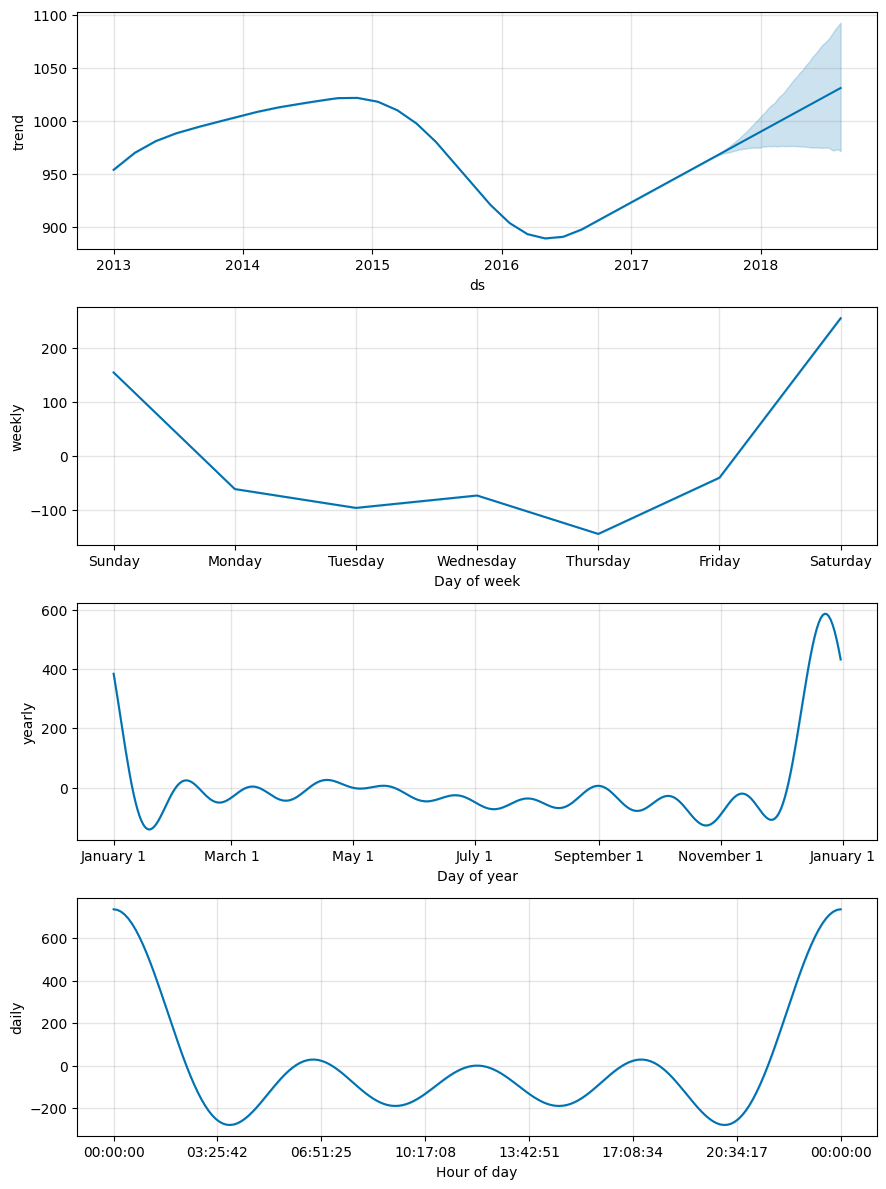

In [70]:
plot3 = p.plot_components(forecast_prediction)